<a href="https://colab.research.google.com/github/varun-sirpal10/convolutional-NN/blob/master/RNN_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

In [19]:
print(len(XT))
print(len(Xt))

25000
25000


In [20]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
word_idx = imdb.get_word_index()

In [0]:
#print(word_idx.items())

In [0]:
## Create a 2D Tensor to be processed by the embedding layer

from keras.preprocessing import sequence

X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [24]:
print(X_train.shape,X_train.shape)

(25000, 500) (25000, 500)


In [25]:
## Create a model in Keras

from keras.layers import Embedding,SimpleRNN,Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])

In [46]:
from keras.callbacks import ModelCheckpoint #save best model, fight overfitting
from keras.callbacks import EarlyStopping #save time


checkpoint = ModelCheckpoint("best_model.h5",monitor="val_loss",save_best_only=True,save_weights_only=False,mode="auto",period=1,verbose=0)
earlystop = EarlyStopping(monitor="val_acc",patience=1)


hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.0064 - acc: 0.9979 - val_loss: 1.2143 - val_acc: 0.7474
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0017 - acc: 0.9994 - val_loss: 1.1516 - val_acc: 0.7702
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.0053 - acc: 0.9983 - val_loss: 1.2273 - val_acc: 0.7530


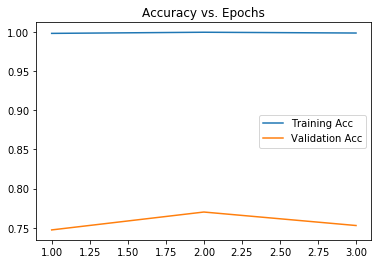

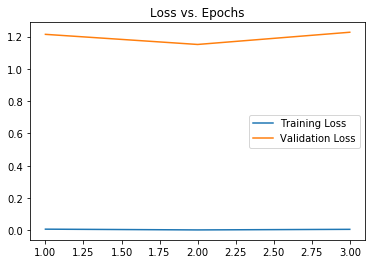

In [47]:
import matplotlib.pyplot as plt

epochs = range(1,len(hist.history['loss'])+1)
plt.title("Accuracy vs. Epochs")
plt.plot(epochs,hist.history['acc'],label="Training Acc")
plt.plot(epochs,hist.history['val_acc'],label="Validation Acc")
plt.legend()
plt.show()

plt.title("Loss vs. Epochs")
plt.plot(epochs,hist.history['loss'],label="Training Loss")
plt.plot(epochs,hist.history['val_loss'],label="Validation Loss")
plt.legend()
plt.show()

In [0]:
#model.save("best_model.h5")

In [40]:
!ls

best_model.h5  my_model.h5  sample_data


In [0]:
model.load_weights("best_model.h5")

In [49]:
model.evaluate(X_test,Yt)

25000/25000 [==============================] - 22s 869us/step


[1.0948166064357758, 0.77884]

In [43]:
model.evaluate(X_train,YT)

25000/25000 [==============================] - 19s 748us/step


[0.46174856139585374, 0.88504]